In [1]:
# Install necessary libraries if not already installed
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install arabic-reshaper
!pip install bidi.algorithm

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import arabic_reshaper
from bidi.algorithm import get_display

ERROR: Could not find a version that satisfies the requirement bidi.algorithm (from versions: none)
ERROR: No matching distribution found for bidi.algorithm


ModuleNotFoundError: No module named 'bidi'

In [3]:
# Import pandas
import pandas as pd

# Expanded dataset of English-to-Arabic translation pairs with 100 examples
data = {
    'english': [
        'Hello', 'How are you?', 'What is your name?', 'Thank you', 'Good morning',
        'Good evening', 'Good night', 'See you later', 'Take care', 'Yes',
        'No', 'Please', 'Excuse me', 'I love you', 'Congratulations',
        'Goodbye', 'Sorry', 'Help me', 'Can you help me?', 'Where is the bathroom?',
        'How much is this?', 'What time is it?', 'I am hungry', 'I am thirsty', 'I am tired',
        'Nice to meet you', 'What is this?', 'Where are you from?', 'I am from here', 'I don’t understand',
        'Can you repeat that?', 'Do you speak English?', 'I speak a little Arabic', 'What do you do?', 'Where do you live?',
        'How old are you?', 'I am a student', 'I am a teacher', 'What is your favorite food?', 'I like coffee',
        'I am learning Arabic', 'It’s a beautiful day', 'Be careful', 'I need a doctor', 'Is there a pharmacy nearby?',
        'Can I have the bill, please?', 'I would like to order', 'This is delicious', 'Where is the hotel?', 'Is it far?',
        'It’s near', 'What’s your phone number?', 'How was your day?', 'What are you doing?', 'I miss you', 'Good luck',
        'Happy birthday', 'Happy anniversary', 'How’s the weather?', 'What’s your favorite color?', 'It’s raining',
        'It’s sunny', 'It’s cold', 'It’s hot', 'It’s warm', 'Do you like music?', 'I like to read', 'I like sports',
        'What’s your hobby?', 'I play soccer', 'I like swimming', 'Do you have pets?', 'I have a dog', 'I have a cat',
        'Are you married?', 'I have children', 'I am single', 'Where is the restaurant?', 'I am allergic to nuts',
        'Do you have a reservation?', 'Can I see the menu?', 'What do you recommend?', 'I am vegetarian', 'Do you have Wi-Fi?',
        'The food is spicy', 'I am ready to order', 'Do you accept credit cards?', 'Thank you very much', 'You’re welcome',
        'I need directions', 'It’s too expensive', 'What’s your email address?', 'Can I try this on?', 'It’s a good deal',
        'How long will it take?', 'What’s the address?', 'Let’s go to the beach', 'Have a safe journey', 'Please call me',
        'Can I ask you something?', 'What’s your favorite movie?', 'Do you have siblings?', 'Where can I buy this?'
    ],
    'arabic': [
        'مرحبا', 'كيف حالك؟', 'ما اسمك؟', 'شكرا لك', 'صباح الخير',
        'مساء الخير', 'تصبح على خير', 'أراك لاحقًا', 'اعتن بنفسك', 'نعم',
        'لا', 'من فضلك', 'عذرًا', 'أحبك', 'مبروك',
        'وداعًا', 'آسف', 'ساعدني', 'هل يمكنك مساعدتي؟', 'أين الحمام؟',
        'كم ثمن هذا؟', 'كم الساعة؟', 'أنا جائع', 'أنا عطشان', 'أنا متعب',
        'سعدت بلقائك', 'ما هذا؟', 'من أين أنت؟', 'أنا من هنا', 'لا أفهم',
        'هل يمكنك تكرار ذلك؟', 'هل تتحدث الإنجليزية؟', 'أعرف بعض العربية', 'ماذا تعمل؟', 'أين تسكن؟',
        'كم عمرك؟', 'أنا طالب', 'أنا معلم', 'ما طعامك المفضل؟', 'أحب القهوة',
        'أتعلم العربية', 'إنه يوم جميل', 'كن حذرًا', 'أحتاج إلى طبيب', 'هل هناك صيدلية قريبة؟',
        'هل يمكنني الحصول على الفاتورة، من فضلك؟', 'أود أن أطلب', 'هذا لذيذ', 'أين الفندق؟', 'هل هو بعيد؟',
        'إنه قريب', 'ما رقم هاتفك؟', 'كيف كان يومك؟', 'ماذا تفعل؟', 'أفتقدك', 'حظًا سعيدًا',
        'عيد ميلاد سعيد', 'عيد سعيد', 'كيف الطقس؟', 'ما لونك المفضل؟', 'إنها تمطر',
        'الجو مشمس', 'الجو بارد', 'الجو حار', 'الجو دافئ', 'هل تحب الموسيقى؟', 'أحب القراءة', 'أحب الرياضة',
        'ما هي هوايتك؟', 'ألعب كرة القدم', 'أحب السباحة', 'هل لديك حيوانات أليفة؟', 'لدي كلب', 'لدي قطة',
        'هل أنت متزوج؟', 'لدي أطفال', 'أنا أعزب', 'أين المطعم؟', 'أنا حساس تجاه المكسرات',
        'هل لديك حجز؟', 'هل يمكنني رؤية القائمة؟', 'ماذا تنصح؟', 'أنا نباتي', 'هل لديكم واي فاي؟',
        'الطعام حار', 'أنا جاهز للطلب', 'هل تقبلون البطاقات؟', 'شكرًا جزيلًا', 'عفوًا',
        'أحتاج إلى الاتجاهات', 'هذا مكلف جدًا', 'ما بريدك الإلكتروني؟', 'هل يمكنني تجربة هذا؟', 'إنها صفقة جيدة',
        'كم سيستغرق من الوقت؟', 'ما هو العنوان؟', 'لنذهب إلى الشاطئ', 'رحلة آمنة', 'اتصل بي من فضلك',
        'هل يمكنني أن أسألك شيئًا؟', 'ما هو فيلمك المفضل؟', 'هل لديك إخوة؟', 'أين يمكنني شراء هذا؟'
    ]
}

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data)

# Display the first few rows to verify
df.head(15)

,english,arabic
0,Hello,مرحبا
1,How are you?,كيف حالك؟
2,What is your name?,ما اسمك؟
3,Thank you,شكرا لك
4,Good morning,صباح الخير
5,Good evening,مساء الخير
6,Good night,تصبح على خير
7,See you later,أراك لاحقًا
8,Take care,اعتن بنفسك
9,Yes,نعم


In [4]:
# Initialize tokenizers for English and Arabic
english_tokenizer = Tokenizer()
arabic_tokenizer = Tokenizer()

# Fit tokenizers on the respective language data
english_tokenizer.fit_on_texts(df['english'])
arabic_tokenizer.fit_on_texts(df['arabic'])

# Convert texts to sequences
english_sequences = english_tokenizer.texts_to_sequences(df['english'])
arabic_sequences = arabic_tokenizer.texts_to_sequences(df['arabic'])

# Pad the sequences to ensure uniform length
max_len = max(max(len(seq) for seq in english_sequences), max(len(seq) for seq in arabic_sequences))
english_padded = pad_sequences(english_sequences, maxlen=max_len, padding='post')
arabic_padded = pad_sequences(arabic_sequences, maxlen=max_len, padding='post')

# Vocabulary sizes for each language
english_vocab_size = len(english_tokenizer.word_index) + 1
arabic_vocab_size = len(arabic_tokenizer.word_index) + 1

In [5]:
# Define the model
model = Sequential()

# Embedding layer for English
model.add(Embedding(input_dim=english_vocab_size, output_dim=64, input_length=max_len))

# LSTM layer to learn sequence patterns
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# Output layer for Arabic, with vocabulary size as the output dimensions
model.add(Dense(arabic_vocab_size, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Reshape Arabic sequences for training (model expects 3D array for labels)
arabic_padded = np.expand_dims(arabic_padded, -1)

In [7]:
# Train the model
history = model.fit(english_padded, arabic_padded, epochs=100, batch_size=2, verbose=1)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5709 - loss: 4.6106
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6522 - loss: 1.9531
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6443 - loss: 1.9110
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6475 - loss: 1.9141
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6734 - loss: 1.7801
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6657 - loss: 1.7610
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6762 - loss: 1.6465
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6710 - loss: 1.6321
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6751 - loss: 1.5562
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6838 - loss: 1.4997
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6903 - loss: 1.3988
Epoch 12/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accurac

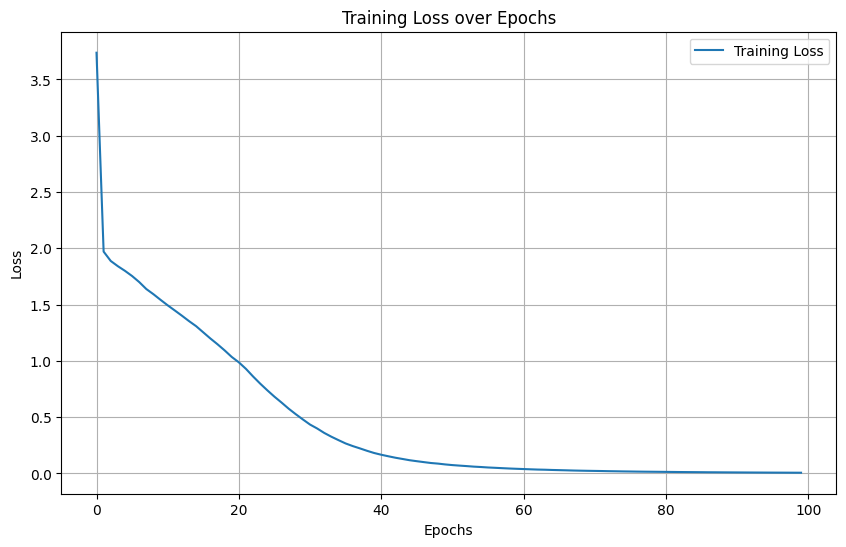

In [8]:
import matplotlib.pyplot as plt

# Plot training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

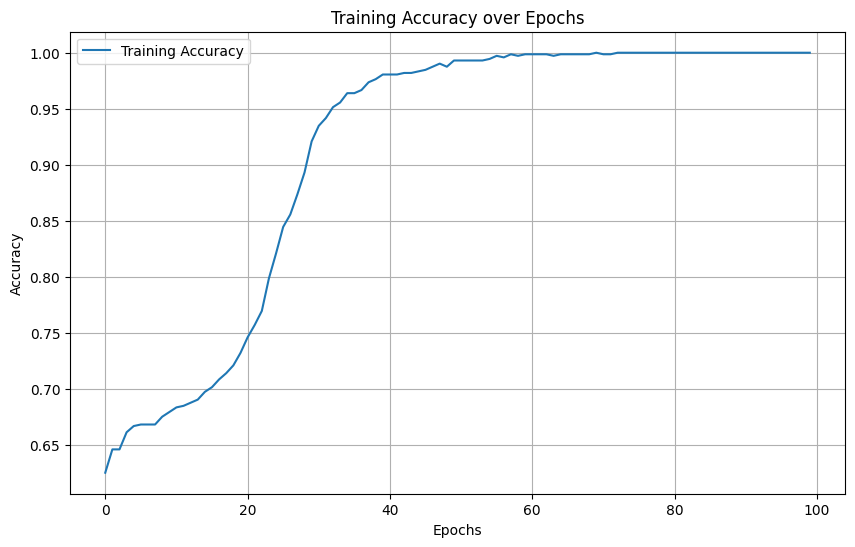

In [10]:
# Plot accuracy over epochs if available
if 'accuracy' in history.history:
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
# Define a function to translate English text to Arabic
def translate(text):
    # Tokenize and pad the input text
    sequence = english_tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Predict using the model
    predictions = model.predict(padded_sequence)
    predicted_sequence = np.argmax(predictions[0], axis=-1)

    # Convert the sequence of tokens back to Arabic words
    arabic_translation = ' '.join([arabic_tokenizer.index_word.get(idx, '') for idx in predicted_sequence if idx > 0])

    # Return the Arabic translation
    return arabic_translation

# List of English phrases to translate
english_phrases = [
    "Good morning",
    "How are you?",
    "Thank you",
    "I love you",
    "See you later",
    "Congratulations",
    "What is your name?",
    "Where is the bathroom?",
    "I am hungry",
    "I am learning Arabic",
    "Please help me"
]

# Test the model with these English phrases
for phrase in english_phrases:
    print(f"English: {phrase}")
    arabic_translation = translate(phrase)
    print(f"Arabic Translation: {arabic_translation}\n")

English: Good morning
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Arabic Translation: صباح الخير

English: How are you?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Arabic Translation: كيف حالك؟

English: Thank you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Arabic Translation: شكرا لك

English: I love you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Arabic Translation: أحبك

English: See you later
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Arabic Translation: أراك لاحقًا

English: Congratulations
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Arabic Translation: مبروك

English: What is your name?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Arabic Translation: ما اسمك؟

English: Where is the bathroom?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Arabic Translation: أين الحمام؟

English: I am hungry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Arabic Translation: أنا جائع

English: I am learning Arabic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Arabic Translation: أتعلم العربية

English: Please help me
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Arabic Tra

In [ ]:
# Interactive generator function for real-time translation
def translate_interactively():
    print("Type an English phrase to translate it to Arabic. Type 'exit' to stop.\n")

    while True:
        # Prompt for English input
        text = input("English: ")

        # Exit condition
        if text.lower() == 'exit':
            print("Translation session ended.")
            break

        # Translate input text to Arabic
        arabic_translation = translate(text)

        # Display Arabic translation
        print(f"Arabic Translation: {arabic_translation}\n")

# Start the interactive translation session
translate_interactively()

Type an English phrase to translate it to Arabic. Type 'exit' to stop.

English: how are you ?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Arabic Translation: كيف حالك؟

English: what are you doing?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Arabic Translation: ماذا تفعل؟

English: sorry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Arabic Translation: آسف

English: thank you 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Arabic Translation: شكرا لك

